<h1> Judgement Pendency Prediction <h1>


The data used in this file is an abridged version of the dataset [available here](https://www.devdatalab.org/judicial-data) based on the work of [Bhowmik et. al. (2021)](https://dl.acm.org/doi/abs/10.1145/3460112.3471943). The cleaned up and abrdiged dataset with license terms used in this code can be downloaded at https://drive.google.com/file/d/1aQcfZTi2GFdyod8bFYi0VEGqX6mUUhJ4/view?usp=drive_link 


## Import of libraries & dataset

### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
from sklearn import tree

### Import of Cases 2010

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
20# Download the dataset from the zip file and keep the file case_2010_final.csv it on your google drive.
# You would have to change path below appropriately to load and run the below line of code.
df_cases2010_orig = pd.read_csv("/content/drive/MyDrive/Law/cases/2010/cases_2010_final.csv")
#print all columns
pd.set_option('display.max_columns', None)
df_cases2010_orig.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,ddl_filing_judge_id,ddl_decision_judge_id,female_judge_filing,start_date_filing,end_date_filing,female_judge_decision,start_date_decision,end_date_decision,judgediff,pendency_decision_filing,pendency_first_filing,pendency_decision_first,pendency_next_last,pendency_decision_last,pendency_decision_next,pendency_decision_filing_categories,pendency_first_filing_categories,filing_judge_tenure,decision_judge_tenure
0,01-01-01-201908000152010,2010,1,1,1,MHNB030003482010,chief judicial magistrate,0,0 male,-9999,0,1429,4946.0,25,2010-04-20 00:00:00+00:00,2011-03-31 00:00:00+00:00,2010-06-23 00:00:00+00:00,2011-02-28 00:00:00+00:00,2011-03-31 00:00:00+00:00,13504.0,1244334.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2.0,9.0,1.0,1.0,0.0,upto 1 year,upto 1 year,NaN,NaN
1,01-01-01-201908000242010,2010,1,1,1,MHNB030001272010,chief judicial magistrate,0,1 female,-9999,-9998,1429,3627.0,22,2010-02-11 00:00:00+00:00,2013-07-01 00:00:00+00:00,2010-03-11 00:00:00+00:00,2013-06-12 00:00:00+00:00,2013-07-01 00:00:00+00:00,4759.0,132871.0,NaN,NaN,1.0,NaN,51.0,NaN,NaN,NaN,0 nonfemale,2013-06-10,2013-09-23,NaN,41,1.0,40.0,1.0,1.0,0.0,3 to 4 years,upto 1 year,NaN,3.0
2,01-01-01-201908000702010,2010,1,1,1,MHNB030014152010,chief judicial magistrate,0,0 male,0,1,1429,509.0,25,2010-05-28 00:00:00+00:00,2015-07-27 00:00:00+00:00,2012-12-24 00:00:00+00:00,2015-06-19 00:00:00+00:00,2015-07-27 00:00:00+00:00,9533.0,1166313.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,31.0,31.0,1.0,1.0,0.0,5 to 6 years,2 to 3 years,NaN,NaN
3,01-01-01-201908001322010,2010,1,1,1,MHNB030009002010,chief judicial magistrate,-9998,1 female,0,0,1429,2237.0,25,2010-08-31 00:00:00+00:00,2010-09-09 00:00:00+00:00,2010-09-03 00:00:00+00:00,2010-09-06 00:00:00+00:00,2010-09-09 00:00:00+00:00,4759.0,1123673.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,upto 1 year,upto 1 year,NaN,NaN
4,01-01-01-201908001572010,2010,1,1,1,MHNB030010732010,chief judicial magistrate,0,1 female,-9999,0,1429,3280.0,30,2010-11-12 00:00:00+00:00,2013-05-13 00:00:00+00:00,2010-12-13 00:00:00+00:00,2013-03-26 00:00:00+00:00,2013-05-13 00:00:00+00:00,4759.0,132871.0,NaN,NaN,1.0,NaN,92.0,NaN,NaN,NaN,0 nonfemale,2011-06-06,2014-02-21,NaN,30,1.0,29.0,2.0,2.0,0.0,2 to 3 years,upto 1 year,NaN,32.0


In [ ]:
df_cases2010_orig.dtypes

ddl_case_id                             object
year                                     int64
state_code                               int64
dist_code                                int64
court_no                                 int64
cino                                    object
judge_position                          object
female_defendant                         int64
female_petitioner                       object
female_adv_def                           int64
female_adv_pet                           int64
type_name                                int64
purpose_name                           float64
disp_name                                int64
date_of_filing                          object
date_of_decision                        object
date_first_list                         object
date_last_list                          object
date_next_list                          object
act                                    float64
section                                float64
bailable_ipc 

## Preprocessing & Feature Engineering

In [ ]:
missing_values = df_cases2010_orig.isna().sum()
total_rows = df_cases2010_orig.shape[0]
# print column names and number of missing values
for col, num_missing in missing_values.items():
    percent_missing = round(num_missing/total_rows*100)
    print(f"Column '{col}' has {num_missing} missing values which is {percent_missing}% of total")

Column 'ddl_case_id' has 0 missing values which is 0% of total
Column 'year' has 0 missing values which is 0% of total
Column 'state_code' has 0 missing values which is 0% of total
Column 'dist_code' has 0 missing values which is 0% of total
Column 'court_no' has 0 missing values which is 0% of total
Column 'cino' has 0 missing values which is 0% of total
Column 'judge_position' has 0 missing values which is 0% of total
Column 'female_defendant' has 0 missing values which is 0% of total
Column 'female_petitioner' has 0 missing values which is 0% of total
Column 'female_adv_def' has 0 missing values which is 0% of total
Column 'female_adv_pet' has 0 missing values which is 0% of total
Column 'type_name' has 0 missing values which is 0% of total
Column 'purpose_name' has 233545 missing values which is 6% of total
Column 'disp_name' has 0 missing values which is 0% of total
Column 'date_of_filing' has 0 missing values which is 0% of total
Column 'date_of_decision' has 570401 missing value

We will drop following features as for year 2010 the majority of data about the filling and decision judges is missing

* ddl_filing_judge_id
* ddl_decision_judge_id
* start_date_filing
* end_date_filing
* start_date_decision
* end_date_decision
* judgediff
* filing_judge_tenure             
* decision_judge_tenure    
* purpose_name


The following are dropped as these dates are converted into categorical variables as periods

* date_of_filing                       
* date_of_decision                    
* date_first_list                    
* date_last_list                        
* date_next_list

The following are dropped as they are just identifiers

* ddl_case_id                            
* year
* cino

These variables are not included as features for our modelling as they will not be available when the model will be used for prediction or deemed not important*

* disp_name
* pendency_first_filing
* pendency_decision_first
* pendency_decision_last
* pendency_decision_filing
* pendency_decision_next
* pendency_next_last

In [ ]:
df_cases2010_orig["court_details"] = df_cases2010_orig["state_code"].astype(str) + "_" + df_cases2010_orig["dist_code"].astype(str) + "_" + df_cases2010_orig["court_no"].astype(str)

df_cases2010_orig["state_district"] = df_cases2010_orig["state_code"].astype(str) + "_" + df_cases2010_orig["dist_code"].astype(str)

In [ ]:
columns_to_drop = ['ddl_filing_judge_id','ddl_decision_judge_id','start_date_filing','end_date_filing','start_date_decision','end_date_decision',\
                   'judgediff','filing_judge_tenure','decision_judge_tenure','date_of_filing','date_of_decision','date_first_list','date_last_list','date_next_list','disp_name',\
                   'pendency_decision_first','pendency_decision_first','pendency_decision_last', 'pendency_decision_next','pendency_first_filing', \
                   'pendency_next_last','ddl_case_id','year','cino','court_no','dist_code','pendency_first_filing_categories','purpose_name']


# Create a copy of the dataframe and start preparing the same for prediction modelling
df_cases2010 = df_cases2010_orig.drop(columns=columns_to_drop, axis=1)


In [ ]:
df_cases2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190783 entries, 0 to 4190782
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   state_code                           int64  
 1   judge_position                       object 
 2   female_defendant                     int64  
 3   female_petitioner                    object 
 4   female_adv_def                       int64  
 5   female_adv_pet                       int64  
 6   type_name                            int64  
 7   act                                  float64
 8   section                              float64
 9   bailable_ipc                         object 
 10  number_sections_ipc                  float64
 11  criminal                             float64
 12  female_judge_filing                  object 
 13  female_judge_decision                object 
 14  pendency_decision_filing             int64  
 15  pendency_decision_filing_categor

In [ ]:
df_cases2010 = df_cases2010.fillna("NA")

In [ ]:
# Convert all other features to categorical except pendency_first_filing which is numerical
# number_sections_ipc is treated as categorical as it has lots of missing values which is better handled as categorical data
df_cases2010['state_code'] = df_cases2010['state_code'].astype(str).astype('category')
df_cases2010['state_district'] = df_cases2010['state_district'].astype(str).astype('category')
df_cases2010['court_details'] = df_cases2010['court_details'].astype(str).astype('category')
df_cases2010['judge_position'] = df_cases2010['judge_position'].astype(str).astype('category')
df_cases2010['female_defendant'] = df_cases2010['female_defendant'].astype(str).astype('category')
df_cases2010['female_petitioner'] = df_cases2010['female_petitioner'].astype(str).astype('category')
df_cases2010['female_adv_def'] = df_cases2010['female_adv_def'].astype(str).astype('category')
df_cases2010['female_adv_pet'] = df_cases2010['female_adv_pet'].astype(str).astype('category')
df_cases2010['type_name'] = df_cases2010['type_name'].astype(str).astype('category')
df_cases2010['act'] = df_cases2010['act'].astype(str).astype('category')
df_cases2010['section'] = df_cases2010['section'].astype(str).astype('category')
df_cases2010['bailable_ipc'] = df_cases2010['bailable_ipc'].astype(str).astype('category')
df_cases2010['number_sections_ipc'] = df_cases2010['number_sections_ipc'].astype(str).astype('category')
df_cases2010['criminal'] = df_cases2010['criminal'].astype(str).astype('category')
df_cases2010['female_judge_filing'] = df_cases2010['female_judge_filing'].astype(str).astype('category')
df_cases2010['female_judge_decision'] = df_cases2010['female_judge_decision'].astype(str).astype('category')
df_cases2010['pendency_decision_filing_categories'] = df_cases2010['pendency_decision_filing_categories'].astype(str).astype('category')

In [ ]:
df_cases2010 = df_cases2010[df_cases2010['pendency_decision_filing_categories'] != 'Undecided']

In [ ]:
mean_vals = df_cases2010['pendency_decision_filing'].mean()
median_vals = df_cases2010['pendency_decision_filing'].median()
percentile_75th = np.percentile(df_cases2010['pendency_decision_filing'], 75)

print("Mean values:\n", mean_vals)
print("\nMedian values:\n", median_vals)
print("\n75th Percentile:\n", percentile_75th)

Mean values:
 36.2776519162895

Median values:
 31.0

75th Percentile:
 56.0


In [ ]:
print(df_cases2010['pendency_decision_filing_categories'].unique().tolist)

<bound method ExtensionArray.tolist of ['upto 1 year', '3 to 4 years', '5 to 6 years', '2 to 3 years', '4 to 5 years', ..., '6 to 7 years', '7 to 8 years', '8 to 9 years', '9 to 10 years', '10 to 11 years']
Length: 11
Categories (12, object): ['1 to 2 years', '10 to 11 years', '2 to 3 years', '3 to 4 years', ...,
                          '8 to 9 years', '9 to 10 years', 'Undecided', 'upto 1 year']>


In [ ]:
# create columns for binary classification problem
mapping_three = {'upto 1 year': 'less_three' ,'1 to 2 years': 'less_three', '2 to 3 years': 'less_three','3 to 4 years': 'three_plus','4 to 5 years': 'three_plus', '5 to 6 years': 'three_plus','6 to 7 years': 'three_plus', '7 to 8 years': 'three_plus','8 to 9 years': 'three_plus', '9 to 10 years': 'three_plus',  '10 to 11 years': 'three_plus','upto 1 year': 'less_three' }
df_cases2010['pendency_model_threeyear'] =df_cases2010['pendency_decision_filing_categories'].replace(mapping_three)
df_cases2010['pendency_model_threeyear'] = df_cases2010['pendency_model_threeyear'].astype(str).astype('category')


In [ ]:
df_cases2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620382 entries, 0 to 4190782
Data columns (total 19 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   state_code                           category
 1   judge_position                       category
 2   female_defendant                     category
 3   female_petitioner                    category
 4   female_adv_def                       category
 5   female_adv_pet                       category
 6   type_name                            category
 7   act                                  category
 8   section                              category
 9   bailable_ipc                         category
 10  number_sections_ipc                  category
 11  criminal                             category
 12  female_judge_filing                  category
 13  female_judge_decision                category
 14  pendency_decision_filing             int64   
 15  pendency_decisi

In [ ]:
y = df_cases2010["pendency_model_threeyear"]

In [ ]:
col = pd.Categorical(y)
y = pd.Series(col.codes)
y_class = col.categories.tolist()

In [ ]:
#We next drop the target variables from the feature matrix
df_cases2010.drop(columns='pendency_decision_filing', axis=1, inplace=True)
df_cases2010.drop(columns='pendency_decision_filing_categories', axis=1, inplace=True)
df_cases2010.drop(columns='pendency_model_threeyear', axis=1, inplace=True)

In [ ]:
# Lable Encode all Categorical Features
le = LabelEncoder()
cat_cols = df_cases2010.select_dtypes(include=['category']).columns
df_cases2010[cat_cols] = df_cases2010[cat_cols].apply(lambda col: le.fit_transform(col))

## Model Building

### Train Test Split

In [ ]:
# Random seed
seed =100
# split-out train/validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(df_cases2010,  y, test_size=0.20, random_state=seed, shuffle=True, stratify=y)


In [ ]:
# Training and Test Data Size
print(df_cases2010_orig.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])
print(X_test.shape[0]+X_train.shape[0])
print((X_test.shape[0]+X_train.shape[0])/df_cases2010_orig.shape[0]*100)

4190783
2896305
724077
3620382
86.38915448497333


### DecisionTree Classifiers  ( Baseline Model )


In [ ]:
# Train a Decision Tree Classifier for binary classification of six year or more
# max_depth is set to avoid overfitting and ensure probalistic output from predict_proba which is used to calculate log_loss
dt = DecisionTreeClassifier(random_state=seed, max_depth = 10)
dt.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dt.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred, target_names = y_class))
# Calculate Log Loss
logloss = log_loss(y_test, dt.predict_proba(X_test))
print("Log Los:", logloss)
#Calculate AUC and plot ROC curve
print("ROC AUC:",roc_auc_score(y_test, y_pred))
fpr, tpr, treshold = precision_recall_curve(y_test, y_pred)
pr_roc_auc = auc(fpr, tpr)
print("PR AUC:",pr_roc_auc)

Accuracy : 0.7379104708477137
Classification report :
               precision    recall  f1-score   support

  less_three       0.74      0.83      0.78    407627
  three_plus       0.74      0.62      0.67    316450

    accuracy                           0.74    724077
   macro avg       0.74      0.72      0.73    724077
weighted avg       0.74      0.74      0.73    724077

Log Los: 0.5243180576195146
ROC AUC: 0.7244867201888228
PR AUC: 0.32518873037341334


### Bagging Tree Classifiers

In [ ]:
# Train a Bagging Tree Classifier for binary classification of six year or more
dtbag = BaggingClassifier(random_state=seed)
dtbag.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dtbag.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred, target_names = y_class))
# Calculate Log Loss
logloss = log_loss(y_test, dtbag.predict_proba(X_test))
print("Log Los:", logloss)
#Calculate AUC and plot ROC curve
print("ROC AUC:",roc_auc_score(y_test, y_pred))
fpr, tpr, treshold = precision_recall_curve(y_test, y_pred)
pr_roc_auc = auc(fpr, tpr)
print("PR AUC:",pr_roc_auc)

Accuracy : 0.8117396354255141
Classification report :
               precision    recall  f1-score   support

  less_three       0.83      0.84      0.83    407627
  three_plus       0.79      0.77      0.78    316450

    accuracy                           0.81    724077
   macro avg       0.81      0.81      0.81    724077
weighted avg       0.81      0.81      0.81    724077

Log Los: 0.8900483890428973
ROC AUC: 0.807602181585274
PR AUC: 0.394731954598174


### XGBoost Classifier

In [ ]:
import time
from xgboost import XGBClassifier
# create a default XGBoost classifier
xg = XGBClassifier(n_estimators=500, random_state=seed)
# define the eval set and metric
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
# fit the model
%time xg.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

# final model assessment
pred_test = xg.predict(X_test)
pred_train = xg.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test, target_names = y_class))
# Calculate Log Loss
logloss = log_loss(y_test, xg.predict_proba(X_test))
print("Log Los:", logloss)
#Calculate AUC and plot ROC curve
print("ROC AUC:",roc_auc_score(y_test, pred_test))
fpr, tpr, treshold = precision_recall_curve(y_test, pred_test)
pr_roc_auc = auc(fpr, tpr)
print("PR AUC:",pr_roc_auc)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


CPU times: user 1h 37min 22s, sys: 4.33 s, total: 1h 37min 26s
Wall time: 28min 5s
Train Accuracy:  0.8110126523277073
Test Accuraccy:  0.8086557092684894
Classification Report:
              precision    recall  f1-score   support

  less_three       0.82      0.85      0.83    407627
  three_plus       0.79      0.76      0.78    316450

    accuracy                           0.81    724077
   macro avg       0.81      0.80      0.80    724077
weighted avg       0.81      0.81      0.81    724077

Log Los: 0.4067858171658429
ROC AUC: 0.8029479919715824
PR AUC: 0.39220289626723087


### Random Forest Classifier

In [ ]:
# Train a Random Forest Classifier for binary classification of six year or more
dtrf = RandomForestClassifier(random_state=seed)
dtrf.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dtrf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report :\n", classification_report(y_test, y_pred, target_names = y_class))

Accuracy: 0.8152558360505858
Classification report :
               precision    recall  f1-score   support

  less_three       0.83      0.84      0.84    407627
  three_plus       0.79      0.78      0.79    316450

    accuracy                           0.82    724077
   macro avg       0.81      0.81      0.81    724077
weighted avg       0.82      0.82      0.82    724077



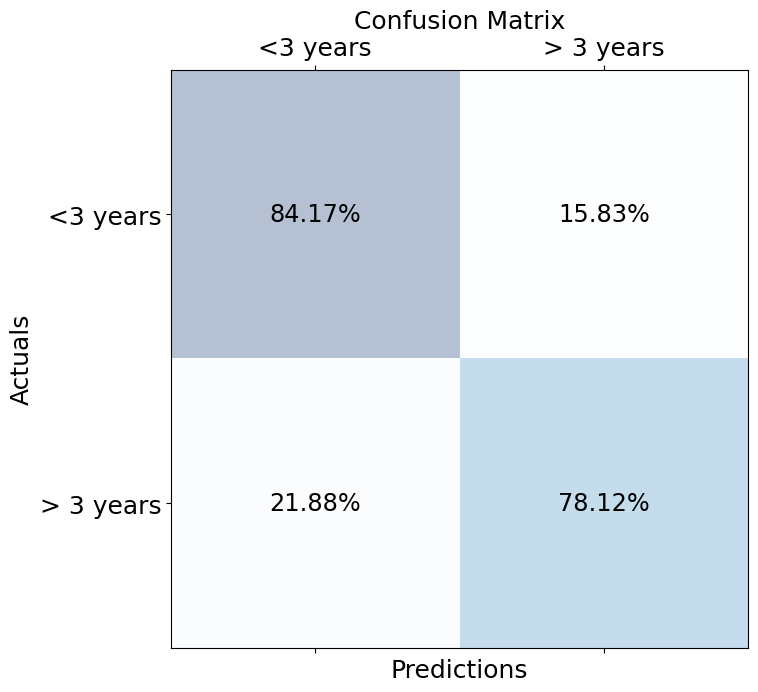

In [ ]:
conf = confusion_matrix(y_test, y_pred)
classes = ["<3 years", "> 3 years"]
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf, cmap=plt.cm.Blues, alpha=0.3)
totalless3 = conf[0,0]+conf[0,1]
totalmore3 = conf[1,0]+conf[1,1]
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        if (i == 0 ):
          ax.text(x=j, y=i,s=format((conf[i, j]/(totalless3)), '.2%'), va='center', ha='center', size='xx-large')
        else:
          ax.text(x=j, y=i,s=format((conf[i, j]/(totalmore3)), '.2%'), va='center', ha='center', size='xx-large')

plt.xticks(np.arange(len(classes)), classes, fontsize=18)
plt.yticks(np.arange(len(classes)), classes, fontsize=18)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(totalless3)

407627


Log Los: 0.5663113659156319
ROC AUC: 0.8114425708966659


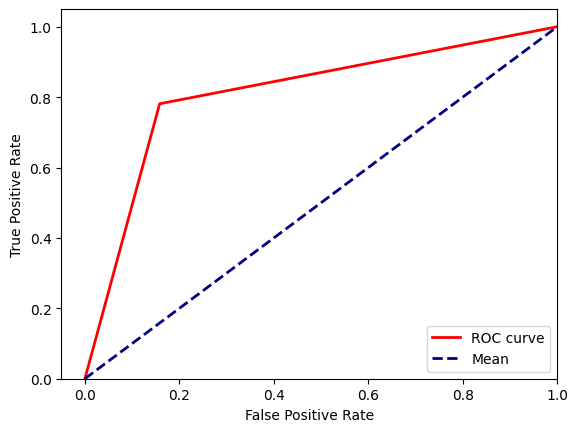

In [ ]:
# Calculate Log Loss
logloss = log_loss(y_test, dtrf.predict_proba(X_test))
print("Log Los:", logloss)
#Calculate AUC and plot ROC curve
print("ROC AUC:",roc_auc_score(y_test, y_pred))
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the AUC ROC curve
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

PR AUC: 0.39787443694525865


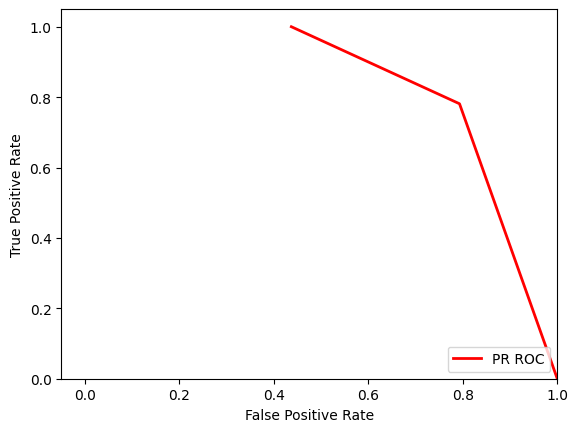

In [ ]:
#Calculate PR AUC and plot ROC curve
fpr, tpr, treshold = precision_recall_curve(y_test, y_pred)
pr_roc_auc = auc(fpr, tpr)
print("PR AUC:",pr_roc_auc)
# Plot the PR ROC curve
plt.plot(fpr, tpr, color='red',
         lw=2, label='PR ROC')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Features')

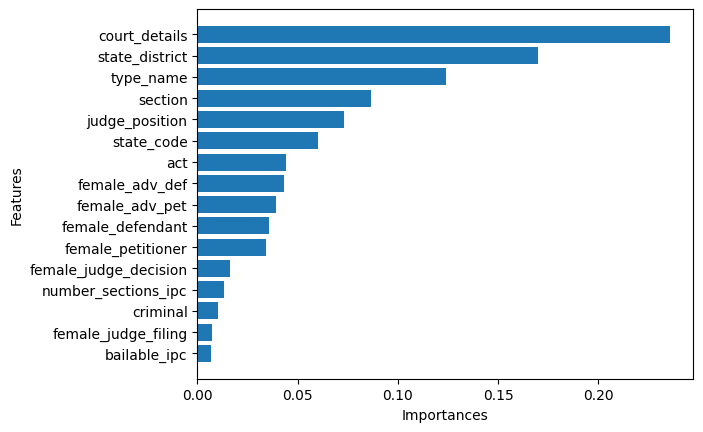

In [ ]:
# get the feature importances
features = np.array(X_train.columns)
importances = dtrf.feature_importances_

# sort the indexes
sorted_index = np.argsort(importances)
sorted_importances = importances[sorted_index]
sorted_features = features[sorted_index]
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.barh(sorted_features , sorted_importances)
ax.set_xlabel('Importances')
ax.set_ylabel('Features')